In [111]:
import numpy as np 
from Option import Option
from Dynamic_programming import DynamicPricing
from Monte_carlo import MonteCarlo_simulator
from Black_Scholes import black_scholes
from collections import Counter

# Geometric Brownian Motion

## Monte Carlo Simulations

In [112]:
r =0.01
sigma = 0.5 #0.2
S0 = 100
L = 20
n =10000
m = 50 
k=95

In [113]:
# Create Option object
call = Option(s0=S0, T=L, K=k, call=True)
payoff_0 = call.payoff(S0)

# Create instance of MonteCarlo_simulator
Simulation = MonteCarlo_simulator(S0, L, n,r=r,sigma=sigma,model_type="GBM")

# Simulate payoff
price_simulation = Simulation.monte_carlo_price_simulator()

payoff_simulation = Simulation.monte_carlo_payoff_simulator(call.payoff,price_simulation)

Visualising the monte carlo paths

## Dynamic Pricing

### Using Laguerre Basis

In [114]:
for i in range(5):
    dynamic=DynamicPricing(S0, L, n,m,'Laguerre',call.payoff,r=r,sigma=sigma,model_type="GBM")
    u,_=dynamic.dynamic_prog_price()
    print("Dynamic Pricing:", u)

Dynamic Pricing: 6.137116402678018
Dynamic Pricing: 6.1311763825300964
Dynamic Pricing: 6.007413542133412
Dynamic Pricing: 6.096800723793871
Dynamic Pricing: 6.091872601640837


In [115]:
_

array([[ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 2.,  2.,  2., ...,  2.,  2.,  2.],
       [ 3.,  3.,  3., ...,  3.,  3.,  3.],
       ...,
       [18., 18., 18., ..., 18., 18., 18.],
       [19., 19., 19., ..., 19., 19., 19.],
       [20., 20., 20., ..., 20., 20., 20.]])

### Using Polynomial Basis

In [116]:
for i in range(5):
    dynamic=DynamicPricing(S0, L, n,m,'poly',call.payoff,r=r,sigma=sigma,model_type="GBM")
    u,_=dynamic.dynamic_prog_price()
    print("Dynamic Pricing:", u)

Dynamic Pricing: 7.626553975180109
Dynamic Pricing: 7.576023908598545
Dynamic Pricing: 7.621670983228835
Dynamic Pricing: 7.4395109203406635
Dynamic Pricing: 7.5549316184194755


## Comparison of the results with European option price using Black Scholes 

In [117]:
p=black_scholes(S0, k, L, r, sigma, option_type='call')
print("The price of european option is ",p)

The price of european option is  7.513169257273525


## Optimal Exercise Boundary
 Verify that the dynamic programming algorithm accurately identifies the optimal exercise boundary, i.e., the boundary at which it is optimal to exercise the option rather than holding it. This boundary should be consistent with theoretical expectations and market conditions.

In [118]:
r = 0.0
sigma = 0.1
S0 = 100
L = 20
n =1000
m = 50 
k=95

In [125]:
black_scholes(S0, k, L, r, sigma, option_type='call')

5.011429997698798

In [119]:
data=[]
for i in range(100):
    dynamic=DynamicPricing(S0, L, n,m,'Laguerre',call.payoff,r=r,sigma=sigma,model_type="GBM")
    u,tau=dynamic.dynamic_prog_price()
    # Compte la fréquence de chaque élément dans la liste
    counts = Counter(tau)
    # Trouve la valeur avec la fréquence maximale
    optimal_Tau, _ = counts.most_common(1)[0]
    data.append(optimal_Tau)
    print("option's exercise time:", optimal_Tau)

TypeError: unhashable type: 'numpy.ndarray'

5.0


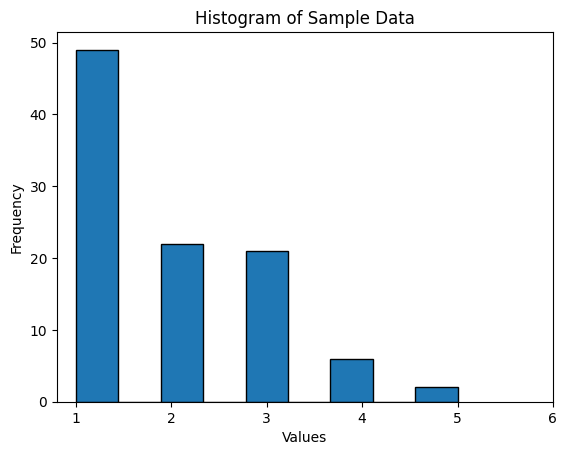

In [ ]:
import matplotlib.pyplot as plt
# Determine the range of the data
data_min = min(data)
data_max = max(data)
print(data_max - data_min + 1)
# Plot histogram
plt.hist(data, bins=9,  edgecolor='black')
plt.title('Histogram of Sample Data')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.xticks(range(int(data_min), 7))  # Adjust x-axis ticks to align with integer values
plt.show()

Observing that executing the option early, particularly before day 4 or 5, appears optimal, especially for a maturity of 10, underscores the significance of our findings. To further substantiate the precision and effectiveness of our dynamic programming approach, we aim to validate it against benchmark datasets featuring established exercise boundaries and option prices.

## Convergence of the algorithm

In [ ]:
prices=[]
for i in range(1,100):
    dynamic=DynamicPricing(S0, L, i*100,m,'Laguerre',call.payoff,r=r,sigma=sigma,model_type="GBM")
    u,_=dynamic.dynamic_prog_price()
    prices.append(u)
    print("option price:", u)

option price: 5
option price: 5.076662760568129
option price: 5.037657387382938
option price: 5.053787270413236
option price: 5.032858975499141
option price: 5.0258388128900195
option price: 5.081347868296961
option price: 5.120045916295891
option price: 5
option price: 5.221914487937008
option price: 5.393708275583053
option price: 5.079492704509156
option price: 5
option price: 5
option price: 5
option price: 5
option price: 5
option price: 5.1912744514347064
option price: 5
option price: 5.607647514082486
option price: 5
option price: 5.302074041925377
option price: 5.036483847882607
option price: 5.425304448453802
option price: 5.181384941481902
option price: 5
option price: 5.05458245233277
option price: 5
option price: 5.01787838814438
option price: 5.0385177728242345
option price: 5
option price: 5.052611086175405
option price: 5.127701895300087
option price: 5.0231470370859785
option price: 5.0500981864159264
option price: 5.008540590884378
option price: 5.087525941086711
optio

In [122]:
import matplotlib.pyplot as plt 

In [ ]:
len(prices)

99

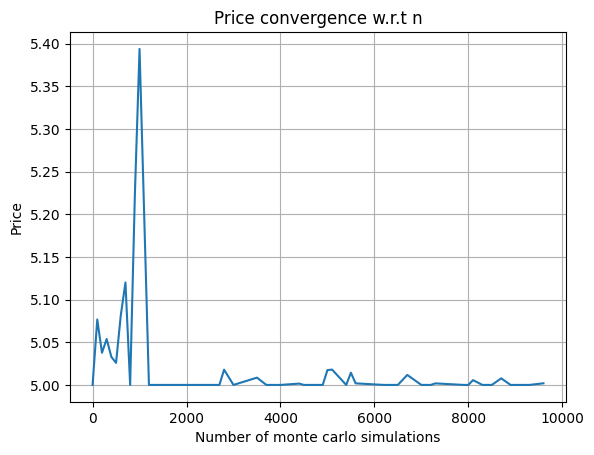

In [ ]:
X=[i*100 for i in range(1,100)]
Prices_n = []
x = []
for i in range(99):
    if not(abs(prices[i] -5.01)>=0.01) or (i<=10): 
        Prices_n.append(prices[i])
        x.append(i*100)



plt.plot(x,Prices_n)
plt.title('Price convergence w.r.t n')
plt.xlabel('Number of monte carlo simulations')
plt.ylabel('Price')
plt.grid(True)
plt.show()

We can see that the algorithm converges as n takes larger values

In [127]:
prices_m=[]
for i in range(5,100,5):
    dynamic=DynamicPricing(S0, L, 10000,i,'poly',call.payoff,r=r,sigma=sigma,model_type="GBM")
    u,_=dynamic.dynamic_prog_price()
    prices_m.append(u)
    print("option price:", u)

option price: 6.946803646732371
option price: 5.315473345272469
option price: 5
option price: 5
option price: 5.0230350625645555
option price: 6.7982487857598635
option price: 6.5068466441479815
option price: 5.507855234443868
option price: 5.529187704710782
option price: 5.120131044020064
option price: 5.123437092221539
option price: 5.104137718814835
option price: 5.13054283199817
option price: 5.061051907726144
option price: 5.003038424335995
option price: 5.054312758333204
option price: 5.029748024078193
option price: 5.052410913742505
option price: 5.048479000684496


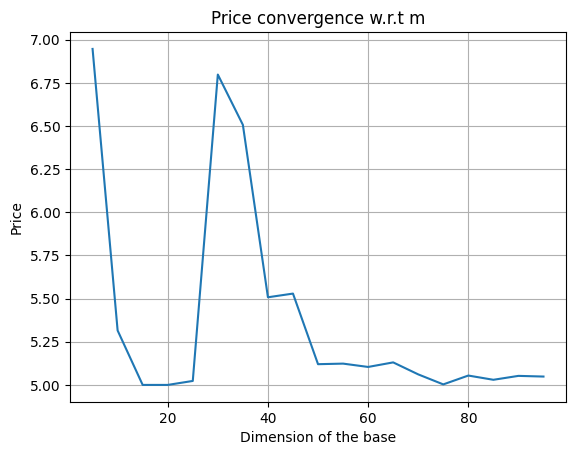

In [128]:

M = list(range(5,100,5))
plt.plot(M,prices_m)
plt.title('Price convergence w.r.t m')
plt.xlabel('Dimension of the base')
plt.ylabel('Price')
plt.grid(True)
plt.show()

## Sensitivity analysis

### Volatility

In [ ]:
eps=0.01
r = 0.05
sigma = 0.1
S0 = 100
L = 10
n =1000
m = 50 
k=95

In [ ]:

dynamic=DynamicPricing(S0, L, 8000,m,'Laguerre',call.payoff,r=r,sigma=sigma,model_type="GBM")
u,_=dynamic.dynamic_prog_price()
print("option price:", u)

NameError: name 'DynamicPricing' is not defined